In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3cadc6efe33ff89b13b6309439d9594


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | yurovka
Processing Record 2 of Set 12 | hasaki
Processing Record 3 of Set 12 | krasnoselkup
Processing Record 4 of Set 12 | auburn
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | milove
Processing Record 7 of Set 12 | cape town
Processing Record 8 of Set 12 | sankt augustin
Processing Record 9 of Set 12 | chapais
Processing Record 10 of Set 12 | sitka
Processing Record 11 of Set 12 | naze
Processing Record 12 of Set 12 | antofagasta
Processing Record 13 of Set 12 | busselton
Processing Record 14 of Set 12 | barbar
City not found. Skipping...
Processing Record 15 of Set 12 | saleaula
City not found. Skipping...
Processing Record 16 of Set 12 | srednekolymsk
Processing Record 17 of Set 12 | hermanus
Processing Record 18 of Set 12 | katsuura
Processing Record 19 of Set 12 | kahului
Processing Record 20 of Set 12 | grafton
Processing Record 21 of Set 12 | luderitz
Processing 

Processing Record 34 of Set 15 | beloha
Processing Record 35 of Set 15 | hobyo
Processing Record 36 of Set 15 | hermiston
Processing Record 37 of Set 15 | koslan
Processing Record 38 of Set 15 | vitim
Processing Record 39 of Set 15 | puerto ayora
Processing Record 40 of Set 15 | getulio vargas
Processing Record 41 of Set 15 | nelson bay
Processing Record 42 of Set 15 | kandrian
Processing Record 43 of Set 15 | sabrum
Processing Record 44 of Set 15 | mrirt
City not found. Skipping...
Processing Record 45 of Set 15 | richards bay
Processing Record 46 of Set 15 | valentin gomez farias
Processing Record 47 of Set 15 | half moon bay
Processing Record 48 of Set 15 | ruthin
Processing Record 49 of Set 15 | masjed-e soleyman
City not found. Skipping...
Processing Record 50 of Set 15 | carnarvon
Processing Record 1 of Set 16 | patacamaya
Processing Record 2 of Set 16 | arauca
Processing Record 3 of Set 16 | sao jose da coroa grande
Processing Record 4 of Set 16 | bengkulu
Processing Record 5 of

Processing Record 18 of Set 19 | rotterdam
Processing Record 19 of Set 19 | izumo
Processing Record 20 of Set 19 | rio grande
Processing Record 21 of Set 19 | kuri
Processing Record 22 of Set 19 | sobolevo
Processing Record 23 of Set 19 | shimoda
Processing Record 24 of Set 19 | atambua
Processing Record 25 of Set 19 | cabo san lucas
Processing Record 26 of Set 19 | sikonge
Processing Record 27 of Set 19 | pisco
Processing Record 28 of Set 19 | almaznyy
Processing Record 29 of Set 19 | arraial do cabo
Processing Record 30 of Set 19 | kaolack
Processing Record 31 of Set 19 | kushima
Processing Record 32 of Set 19 | tarakan
Processing Record 33 of Set 19 | jiuquan
Processing Record 34 of Set 19 | marystown
Processing Record 35 of Set 19 | aporawan
City not found. Skipping...
Processing Record 36 of Set 19 | levelland
Processing Record 37 of Set 19 | yulara
Processing Record 38 of Set 19 | cayenne
Processing Record 39 of Set 19 | tuatapere
Processing Record 40 of Set 19 | ilulissat
Proces

Processing Record 4 of Set 23 | codrington
Processing Record 5 of Set 23 | kokopo
Processing Record 6 of Set 23 | namibe
Processing Record 7 of Set 23 | great yarmouth
Processing Record 8 of Set 23 | ukiah
Processing Record 9 of Set 23 | oum hadjer
Processing Record 10 of Set 23 | belle fourche
Processing Record 11 of Set 23 | amahai
Processing Record 12 of Set 23 | christchurch
Processing Record 13 of Set 23 | eustis
Processing Record 14 of Set 23 | dunmore town
Processing Record 15 of Set 23 | makakilo city
Processing Record 16 of Set 23 | north platte
Processing Record 17 of Set 23 | manhattan
Processing Record 18 of Set 23 | svetlaya
Processing Record 19 of Set 23 | kangavar
Processing Record 20 of Set 23 | moyale
Processing Record 21 of Set 23 | manggar
Processing Record 22 of Set 23 | chute-aux-outardes
Processing Record 23 of Set 23 | araguatins
City not found. Skipping...
Processing Record 24 of Set 23 | itarema
Processing Record 25 of Set 23 | jerantut
Processing Record 26 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yurovka,45.1147,37.4188,51.30,82,40,8.95,RU,2021-09-28 23:55:05
1,Hasaki,35.7333,140.8333,72.28,69,34,6.26,JP,2021-09-28 23:55:06
2,Krasnoselkup,65.7000,82.4667,30.47,77,76,5.37,RU,2021-09-28 23:55:06
3,Auburn,47.3073,-122.2284,63.34,78,20,1.99,US,2021-09-28 23:51:10
4,Ushuaia,-54.8000,-68.3000,46.06,49,75,21.85,AR,2021-09-28 23:52:36
5,Milove,49.3787,40.1302,45.34,81,99,8.93,UA,2021-09-28 23:55:06
6,Cape Town,-33.9258,18.4232,60.28,71,20,14.97,ZA,2021-09-28 23:54:39
7,Sankt Augustin,50.7667,7.1833,54.82,85,0,2.30,DE,2021-09-28 23:55:07
8,Chapais,49.7834,-74.8492,40.78,97,100,8.41,CA,2021-09-28 23:55:07
9,Sitka,57.0531,-135.3300,51.62,62,99,6.55,US,2021-09-28 23:55:07


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yurovka,RU,2021-09-28 23:55:05,45.1147,37.4188,51.30,82,40,8.95
1,Hasaki,JP,2021-09-28 23:55:06,35.7333,140.8333,72.28,69,34,6.26
2,Krasnoselkup,RU,2021-09-28 23:55:06,65.7000,82.4667,30.47,77,76,5.37
3,Auburn,US,2021-09-28 23:51:10,47.3073,-122.2284,63.34,78,20,1.99
4,Ushuaia,AR,2021-09-28 23:52:36,-54.8000,-68.3000,46.06,49,75,21.85
5,Milove,UA,2021-09-28 23:55:06,49.3787,40.1302,45.34,81,99,8.93
6,Cape Town,ZA,2021-09-28 23:54:39,-33.9258,18.4232,60.28,71,20,14.97
7,Sankt Augustin,DE,2021-09-28 23:55:07,50.7667,7.1833,54.82,85,0,2.30
8,Chapais,CA,2021-09-28 23:55:07,49.7834,-74.8492,40.78,97,100,8.41
9,Sitka,US,2021-09-28 23:55:07,57.0531,-135.3300,51.62,62,99,6.55


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

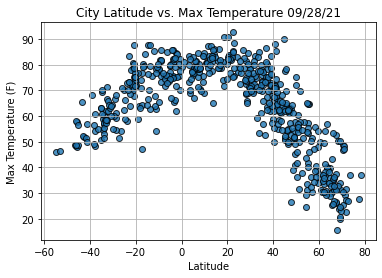

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

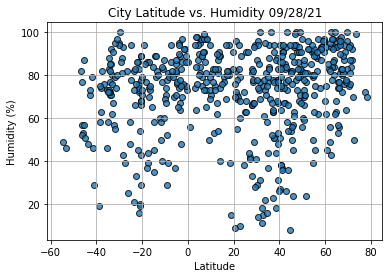

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

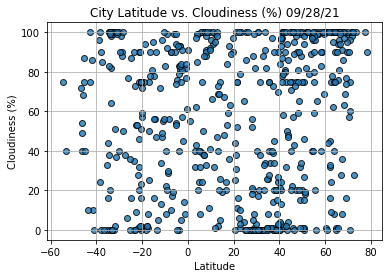

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

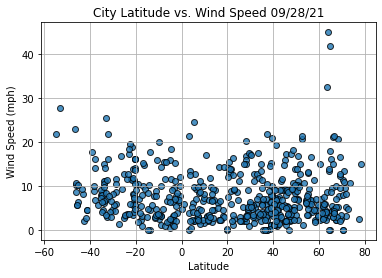

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()